# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante: Jorge Hiler Ricardo
#### Segundo integrante: Santiago Gaviria Zapata

In [4]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
# from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [5]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [7]:
import math
import numpy as np
import numpy.matlib as matlib
from numpy import random
from sklearn.model_selection import StratifiedKFold

from sklearn import tree



#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]
    
    #Normalizamos los datos
    #media = np.mean(Xtrain)
    #desvia = np.std(Xtrain)
    #Xtrain = sc.stats.stats.zscore(Xtrain)
    #Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/matlib.repmat(desvia, Xtest.shape[0], 1)
    
    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    #model = ...
    
    #model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
    model = tree.DecisionTreeClassifier(max_depth=10)
    model.fit(Xtrain, Ytrain)
    
    
    
    #Validación
    Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
    
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
    j += 1
        
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041819614588368+-0.03325916115155368


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:


1. Permitir que el arbol crezca hasta que alcance un limite deseado de impureza.
2. Dividir un nodo solo si la reducción en la impureza es mayor a un valor minimo establecido.
3. Establecer un minimo de muestras requeridas para dividir un nodo
4. Establecer un minimo de muestras para ser un nodo hoja 
5. Establecer una profundiad maxima del arbol
6. Establecer una fracción minima de la suma total de todos los pesos dados a cada muestra (por defecto es el mismo peso para todos, lo que sería igual a establecer un minimo número de muestras para la división)


1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:

1. min_impurity_split
2. min_impurity_decrease
3. min_samples_split
4. min_samples_leaf
5. max_depth 
6. min_weight_fraction_leaf

## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [9]:
import pandas as pd
import qgrid
import numpy as np
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [58]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.9111884805947097,0.044609582556530296
10,0.9013808190321215,0.032391925101484476
20,0.9013808190321215,0.032391925101484476
30,0.9013808190321215,0.032391925101484476
50,0.9013808190321215,0.032391925101484476


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.    

La diferencia es mínima debido a que la normalización no tiene ningún efecto los arboles de decisión dado que en este solo se comparan umbrales. Busca la mejor división para la dimensión de una característica seleccionada entonces no importa su escala en relación a las demás características. 

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


def modelClassifier(n_estimators, max_features, tipo):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento

        if tipo == 1: #RandomForest
            model = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features)
            model = model.fit(Xtrain,Ytrain)
        else :  #Bagging
            model = BaggingClassifier(n_estimators= n_estimators,max_features = max_features)
            model = model.fit(Xtrain,Ytrain)


        #Validación
        Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
        
    return np.mean(EficienciaVal), np.std(EficienciaVal)
        
    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
        
        


Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [34]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]), 'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
#df_types.sort_index(inplace=True)
df_types["Eficiencia en validacion"][2]=0.8778
df_types["Intervalo de confianza"][2] = 0.0143
i = 0
numero_arboles = [5,10,20,50,100]
eficiencia = np.ones(30)
ic = np.ones(30)
k=0
while i < 5:
    j = 0
    while j<=5:
        ef,co = modelClassifier(numero_arboles[i], (j+1)*5, 1)
        #print(numero_arboles[i], j*5)
        eficiencia[k] = ef
        ic[k]=co
        #df_types["Eficiencia en validacion"][k]= ef
        #df_types["Intervalo de confianza"][k] = co
        j = j + 1
        k = k + 1
        
    i = i + 1    
print(eficiencia)    
df_types["Eficiencia en validacion"]= eficiencia
df_types["Intervalo de confianza"] = ic
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

(0.9513611470244373, 0.02222907462205584)
-0.4300920760000224
(0.9291913540071861, 0.02564760207180468)
-0.47085051700000236


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [22]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Numero de arboles Variables analizadas por nodo                             
5                 5                                              0.877753   
                  10                                             0.924917   
                  15                                             0.937502   
                  20                                             0.936214   
                  25                                             0.902770   
                  30                                             0.923713   
10                5                                              0.915317   
                  10                                             0.926522   
                  15                                             0.923604   
                  20                                             0.925032   
                  25                                             0.922301   
                  30                                             0.922347   
20                5                                              0.945890   
                  10                                             0.934801   
                  15                                             0.938829   
                  20                                             0.933327   
                  25                                             0.926429   
                  30                                             0.930635   
50                5                                              0.955467   
                  10                                             0.952750   
                  15                                             0.947171   
                  20                                             0.934748   
                  25                                             0.937548   
                  30                                             0.925009   
100               5                                              0.969388   
                  10                                             0.958268   
                  15                                             0.941646   
                  20                                             0.934693   
                  25                                             0.934724   
                  30                                             0.929230   

                                                 Intervalo de confianza  
Numero de arboles Variables analizadas por nodo                          
5                 5                                            0.014338  
                  10                                           0.036448  
                  15                                           0.015405  
                  20                                           0.027417  
                  25                                           0.027768  
                  30                                           0.032797  
10                5                                            0.033628  
                  10                                           0.024225  
                  15                                           0.034535  
                  20                                           0.025014  
                  25                                           0.026770  
                  30                                           0.030413  
20                5                                            0.015236  
                  10                                           0.024835  
                  15                                           0.022898  
                  20                                           0.024399  
                  25                                           0.025222  
                  30                                           0.027808  
50                5                                            0.020782  
                  10          

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

In [30]:
cantTree = 50
c = 39 
print("Bagging")
print("Eficiencia en la validacion y Desviación")
print(modelClassifier(cantTree, caracteristicas, 1))

Bagging
Validacion y Desviación
(0.9208886286144272, 0.02888445276935772)


Para 50 arboles el algoritmo de Random Forest tiene una menor eficiencia en la validación e intervalo de confianza, lo que hace mejor a Random Forest

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

[0.10764344399999004, 0.1606545340000025, 0.31199108900000283, 0.8971455930000047, 1.7963313550000066]


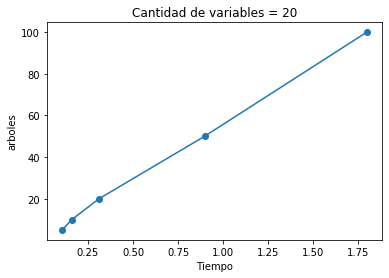

[0.298586456999999, 0.3469741309999961, 0.5151922359999901, 0.5023131349999801, 0.5687633729999959, 0.6864136490000021]


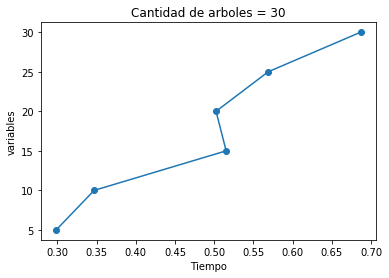

In [32]:
import time as tm

cant_tree = [5,10,20,50,100]
times_tree_1 = []

for n in cant_tree:
    initial_time = tm.process_time()
    ef, ic = modelClassifier(n,20, 1)
    times_tree_1.append(tm.process_time() - initial_time)
print(times_tree_1)

plt.figure()
plt.plot(times_tree_1,cant_tree,'o-')
plt.title('Cantidad de variables = 20')
plt.ylabel('arboles')
plt.xlabel('Tiempo')
plt.show()


times_tree = []
cant_variables = np.arange(5,31,5)
for n in cant_variables:
    initial_time = tm.process_time()
    ef, ic = modelClassifier(30,n, 1)
    times_tree.append(tm.process_time() - initial_time)
print(times_tree)



plt.figure()
plt.plot(times_tree,cant_variables,'o-')
plt.title('Cantidad de arboles = 30')
plt.ylabel('variables')
plt.xlabel('Tiempo')
plt.show()

